In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
data = pd.read_csv(r'c:\Users\Dell\Desktop\spaceship-titanic\train.csv')
data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [3]:
test = pd.read_csv(r'c:\Users\Dell\Desktop\spaceship-titanic\test.csv')

#### Feature Details

PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.

HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.

CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. 

Passengers in cryosleep are confined to their cabins.

Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.

Destination - The planet the passenger will be debarking to.

Age - The age of the passenger.

VIP - Whether the passenger has paid for special VIP service during the voyage.

RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.

Name - The first and last names of the passenger.

Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.


In [4]:
# check for summary of features 

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [5]:
print("Categorical Variables:")
categorical_variables = data.select_dtypes(include=['object']).columns
for col in categorical_variables:
    print(col)

Categorical Variables:
PassengerId
HomePlanet
CryoSleep
Cabin
Destination
VIP
Name


In [6]:
print("Categorical Variables for test:")
categorical_test = test.select_dtypes(include=['object']).columns
for col in categorical_test:
    print(col)

Categorical Variables for test:
PassengerId
HomePlanet
CryoSleep
Cabin
Destination
VIP
Name


In [7]:
Id = test.PassengerId

In [8]:
print("Numerical Variables:")
numerical_variables = data._get_numeric_data().columns
for col in numerical_variables:
    print(col)

Numerical Variables:
Age
RoomService
FoodCourt
ShoppingMall
Spa
VRDeck
Transported


In [9]:
print("Numerical Variables for test:")
numerical_test = test._get_numeric_data().columns
for col in numerical_test:
    print(col)

Numerical Variables for test:
Age
RoomService
FoodCourt
ShoppingMall
Spa
VRDeck


In [10]:
data.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [11]:
for col in data.columns:
    print(col, data[col].isnull().sum())

PassengerId 0
HomePlanet 201
CryoSleep 217
Cabin 199
Destination 182
Age 179
VIP 203
RoomService 181
FoodCourt 183
ShoppingMall 208
Spa 183
VRDeck 188
Name 200
Transported 0


In [12]:
for col in test.columns:
    print(col, test[col].isnull().sum())

PassengerId 0
HomePlanet 87
CryoSleep 93
Cabin 100
Destination 92
Age 91
VIP 93
RoomService 82
FoodCourt 106
ShoppingMall 98
Spa 101
VRDeck 80
Name 94


In [13]:
for col in data.columns:
    percentage_null_values = str(data[col].isnull().sum()/len(data))+"%"
    print(col, percentage_null_values)

PassengerId 0.0%
HomePlanet 0.023122052225928908%
CryoSleep 0.02496261359714713%
Cabin 0.02289198205452663%
Destination 0.02093638559760727%
Age 0.020591280340503854%
VIP 0.023352122397331185%
RoomService 0.02082135051190613%
FoodCourt 0.021051420683308408%
ShoppingMall 0.02392729782583688%
Spa 0.021051420683308408%
VRDeck 0.021626596111814105%
Name 0.023007017140227768%
Transported 0.0%


### Data Preprocessing

#### Handling null values

In [14]:
# replace none values with the most common value for the categorical values
for cat_val in categorical_variables:
    if cat_val!= "Name":
        data[cat_val] = data[cat_val].fillna(data[cat_val].mode()[0])

In [15]:
# test testset
# replace none values with the most common value for the categorical values
for cat_val in categorical_test:
    if cat_val!= "Name":
        test[cat_val] = test[cat_val].fillna(test[cat_val].mode()[0])

In [16]:
for cat_val in categorical_variables:
    print(cat_val, data[cat_val].isnull().sum())

PassengerId 0
HomePlanet 0
CryoSleep 0
Cabin 0
Destination 0
VIP 0
Name 200


In [17]:
for cat_val in categorical_test:
    print(cat_val, test[cat_val].isnull().sum())

PassengerId 0
HomePlanet 0
CryoSleep 0
Cabin 0
Destination 0
VIP 0
Name 94


In [18]:
# replace the null values with the mean for numerical vaules
for num_val in numerical_variables:
    data[num_val] = data[num_val].fillna(data[num_val].mean())

    print(num_val, data[num_val].isnull().sum())

Age 0
RoomService 0
FoodCourt 0
ShoppingMall 0
Spa 0
VRDeck 0
Transported 0


In [19]:
# replace the null values with the mean for numerical vaules
for num_val in numerical_test:
    test[num_val] = test[num_val].fillna(test[num_val].mean())

    print(num_val, test[num_val].isnull().sum())

Age 0
RoomService 0
FoodCourt 0
ShoppingMall 0
Spa 0
VRDeck 0


In [20]:
# drop name columns not needed anymore
data.drop(['Name'], axis=1, inplace=True)

In [21]:
# drop name columns not needed anymore
test.drop(['Name'], axis=1, inplace=True)

In [22]:
categorical_variables = data.select_dtypes(include=['object']).columns

In [23]:
categorical_variables

Index(['PassengerId', 'HomePlanet', 'Cabin', 'Destination'], dtype='object')

In [24]:
data.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Transported'],
      dtype='object')

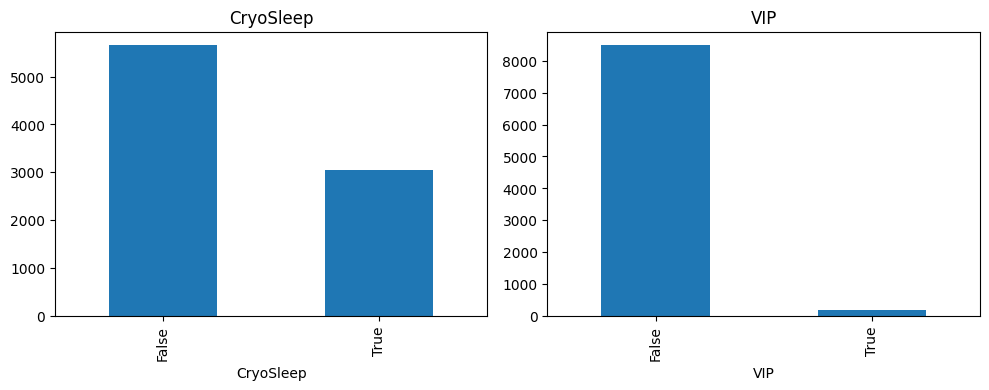

In [25]:
plt.figure(figsize=(10,7))
# plt.subplot(2,2,1)
# data['HomePlanet'].value_counts().plot(kind='bar', title='HomePlanet')
# plt.subplot(2,2,2)
# data['Destination'].value_counts().plot(kind='bar', title='Destination')
plt.subplot(2,2,3)
data['CryoSleep'].value_counts().plot(kind='bar', title='CryoSleep')
plt.subplot(2,2,4)
data['VIP'].value_counts().plot(kind='bar', title='VIP')
plt.tight_layout();

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8693 non-null   object 
 2   CryoSleep     8693 non-null   bool   
 3   Cabin         8693 non-null   object 
 4   Destination   8693 non-null   object 
 5   Age           8693 non-null   float64
 6   VIP           8693 non-null   bool   
 7   RoomService   8693 non-null   float64
 8   FoodCourt     8693 non-null   float64
 9   ShoppingMall  8693 non-null   float64
 10  Spa           8693 non-null   float64
 11  VRDeck        8693 non-null   float64
 12  Transported   8693 non-null   bool   
dtypes: bool(3), float64(6), object(4)
memory usage: 704.7+ KB


In [27]:
data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


In [28]:
test

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.000000,False,0.0,0.0,0.0,0.0,0.0
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.000000,False,0.0,9.0,0.0,2823.0,0.0
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.000000,False,0.0,0.0,0.0,0.0,0.0
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.000000,False,0.0,6652.0,0.0,181.0,585.0
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.000000,False,10.0,0.0,635.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.000000,False,0.0,0.0,0.0,0.0,0.0
4273,9269_01,Earth,False,G/160/P,TRAPPIST-1e,42.000000,False,0.0,847.0,17.0,10.0,144.0
4274,9271_01,Mars,True,D/296/P,55 Cancri e,28.658146,False,0.0,0.0,0.0,0.0,0.0
4275,9273_01,Europa,False,D/297/P,TRAPPIST-1e,28.658146,False,0.0,2680.0,0.0,0.0,523.0


#### Exploratory Data Analysis

In [29]:
# Summary Statistics
data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.339054,659.739364,1594.434978,597.417440,1124.675871,1133.259049
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,78.000000,118.000000,45.000000,89.000000,71.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [30]:
test.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,4277.000000,4277.000000,4277.000000,4277.000000,4277.000000,4277.000000
mean,28.658146,219.266269,439.484296,177.295525,303.052443,310.710031
std,14.027384,601.162847,1508.609201,554.357251,1103.913087,1235.274606
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,79.000000,143.000000,51.000000,83.000000,53.000000
max,79.000000,11567.000000,25273.000000,8292.000000,19844.000000,22272.000000


In [31]:
data.describe(include=['O'])

,PassengerId,HomePlanet,Cabin,Destination
count,8693,8693,8693,8693
unique,8693,3,6560,3
top,0001_01,Earth,G/734/S,TRAPPIST-1e
freq,1,4803,207,6097


##### Categorical Features

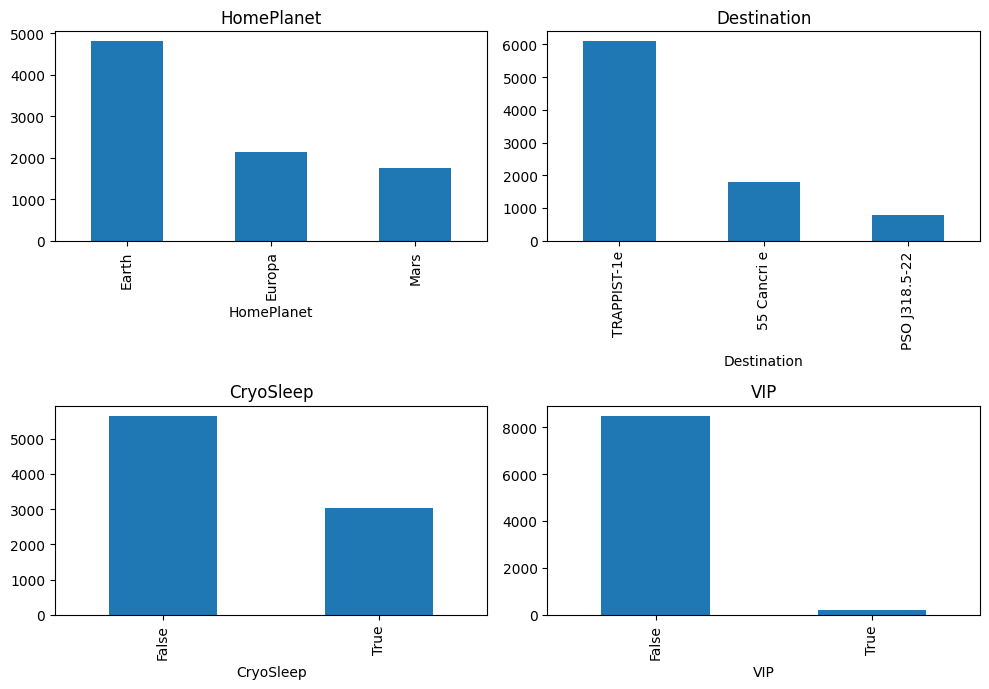

In [32]:
plt.figure(figsize=(10,7))
plt.subplot(2,2,1)
data['HomePlanet'].value_counts().plot(kind='bar', title='HomePlanet')
plt.subplot(2,2,2)
data['Destination'].value_counts().plot(kind='bar', title='Destination')
plt.subplot(2,2,3)
data['CryoSleep'].value_counts().plot(kind='bar', title='CryoSleep')
plt.subplot(2,2,4)
data['VIP'].value_counts().plot(kind='bar', title='VIP')
plt.tight_layout();

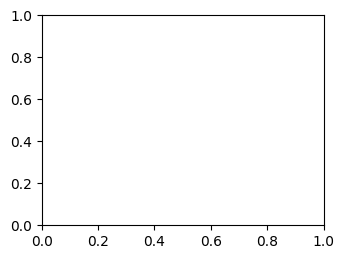

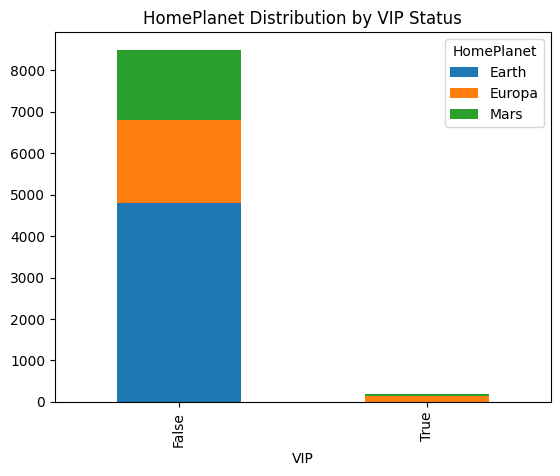

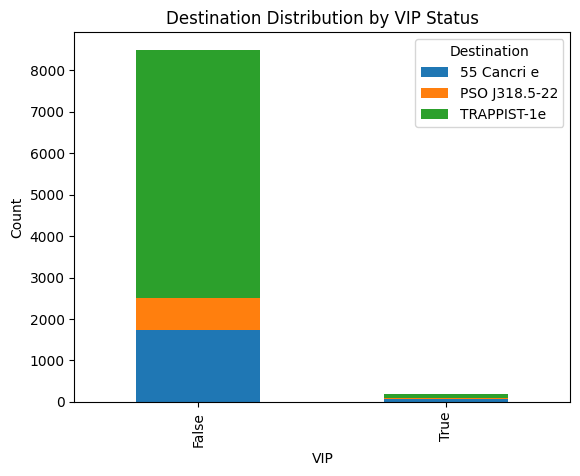

In [33]:
plt.figure(figsize=(8, 6))
plt.subplot(2, 2, 1)
pd.crosstab(data['VIP'], data['HomePlanet']).plot(kind='bar', stacked=True)
plt.title('HomePlanet Distribution by VIP Status')
pd.crosstab(data['VIP'], data['Destination']).plot(kind='bar', stacked=True)
plt.title('Destination Distribution by VIP Status')
plt.xlabel('VIP')
plt.ylabel('Count')
plt.show()

##### Numerical Features

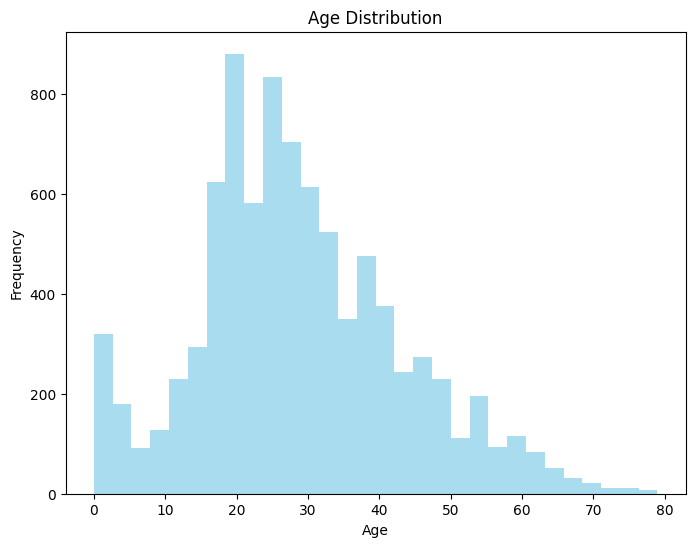

In [34]:
plt.figure(figsize=(8, 6))
plt.hist(data['Age'], bins=30, color='skyblue', alpha=0.7)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

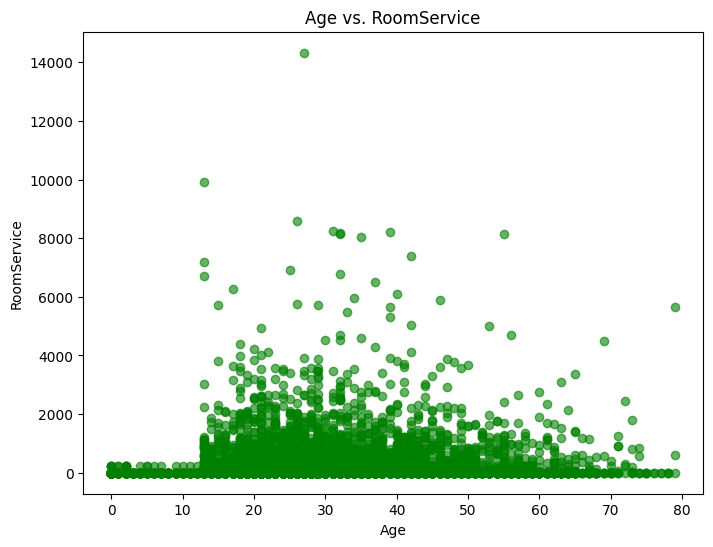

In [35]:
# Relationship between age and amount spent on room service
plt.figure(figsize=(8, 6))
plt.scatter(data['Age'], data['RoomService'], color='green', alpha=0.6)
plt.title('Age vs. RoomService')
plt.xlabel('Age')
plt.ylabel('RoomService')
plt.show()


c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

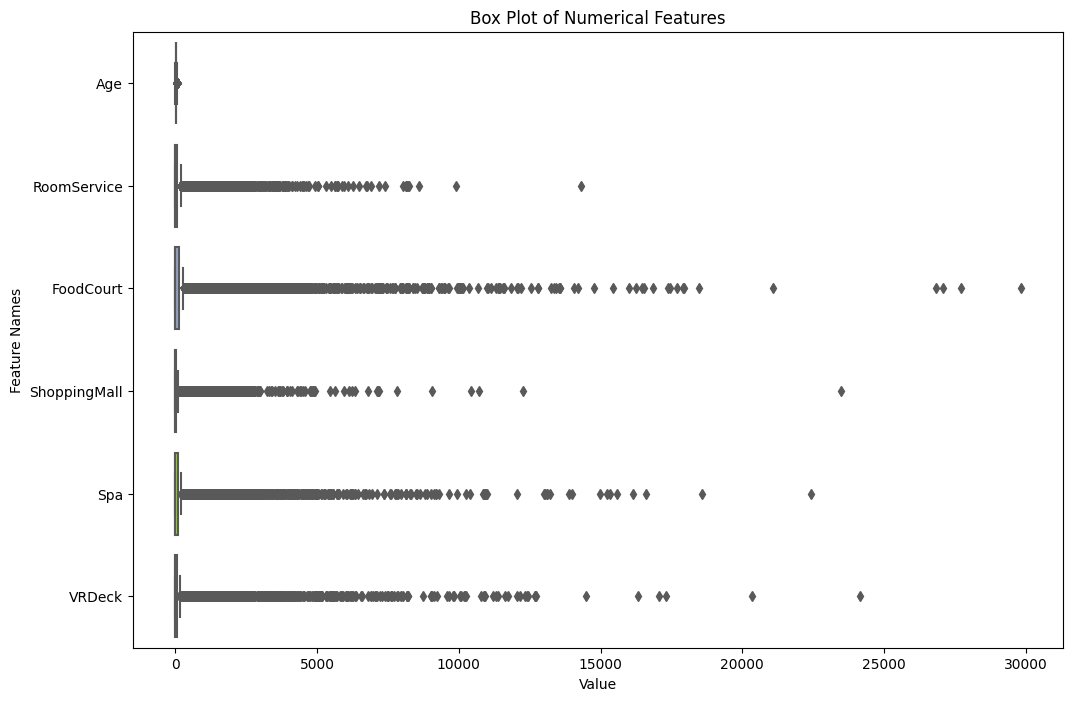

In [36]:
# Box plot showing all numerical features


# Selecting only numerical features (assuming 'data' is your DataFrame)
numerical_features = data.select_dtypes(include=['float64', 'int64'])

# Setting the figure size
plt.figure(figsize=(12, 8))

# Creating multiple box plots for numerical features
sns.boxplot(data=numerical_features, orient='h', palette='Set2')

# Setting plot labels and title
plt.title('Box Plot of Numerical Features')
plt.xlabel('Value')
plt.ylabel('Feature Names')

# Display the plot
plt.show()


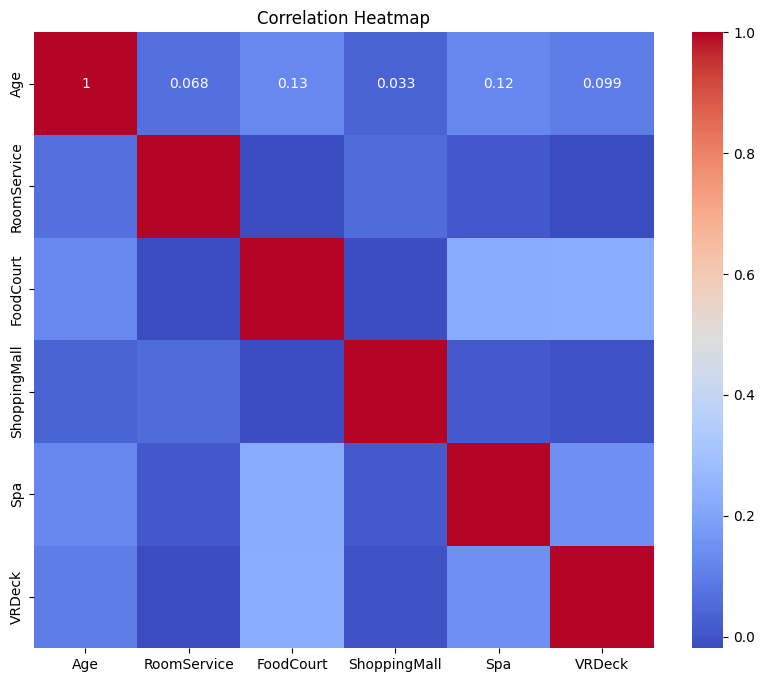

In [37]:
# Correlation between numerical features
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_features.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

#### Encoding Categorical Variables
Categorical variables need to be encoded into numerical values before feeding them into machine learning algorithms.

In [38]:
print(data.select_dtypes(exclude=['float64', 'int64']))

     PassengerId HomePlanet  CryoSleep     Cabin    Destination    VIP  \
0        0001_01     Europa      False     B/0/P    TRAPPIST-1e  False   
1        0002_01      Earth      False     F/0/S    TRAPPIST-1e  False   
2        0003_01     Europa      False     A/0/S    TRAPPIST-1e   True   
3        0003_02     Europa      False     A/0/S    TRAPPIST-1e  False   
4        0004_01      Earth      False     F/1/S    TRAPPIST-1e  False   
...          ...        ...        ...       ...            ...    ...   
8688     9276_01     Europa      False    A/98/P    55 Cancri e   True   
8689     9278_01      Earth       True  G/1499/S  PSO J318.5-22  False   
8690     9279_01      Earth      False  G/1500/S    TRAPPIST-1e  False   
8691     9280_01     Europa      False   E/608/S    55 Cancri e  False   
8692     9280_02     Europa      False   E/608/S    TRAPPIST-1e  False   

      Transported  
0           False  
1            True  
2           False  
3           False  
4          

In [39]:
# Drop PassengerId if it's in your DataFrame
data = data.drop(columns=['PassengerId'], axis = 1)

# One-hot encode HomePlanet, Destination, and Cabin
data = pd.get_dummies(data, columns=['HomePlanet', 'Destination'], drop_first=True)

In [40]:
# Drop PassengerId if it's in your testFrame
test = test.drop(columns=['PassengerId'])

# One-hot encode HomePlanet, Destination, and Cabin
test = pd.get_dummies(test, columns=['HomePlanet', 'Destination'], drop_first=True)

In [41]:
# Reduce dimensionality of the Cabin column because the values are to much to be encoded

from sklearn.decomposition import PCA

# Assuming 'data' is your DataFrame and 'Cabin' is the column to be reduced
pca = PCA(n_components=1)
data['Cabin_PCA'] = pca.fit_transform(data['Cabin'].astype('category').cat.codes.values.reshape(-1, 1))


In [42]:
# Reduce dimensionality of the Cabin column because the values are to much to be encoded

from sklearn.decomposition import PCA

# Assuming 'test' is your testFrame and 'Cabin' is the column to be reduced
pca = PCA(n_components=1)
test['Cabin_PCA'] = pca.fit_transform(test['Cabin'].astype('category').cat.codes.values.reshape(-1, 1))


In [43]:
data.head()

,CryoSleep,Cabin,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Europa,HomePlanet_Mars,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Cabin_PCA
0,False,B/0/P,39.0,False,0.0,0.0,0.0,0.0,0.0,False,True,False,False,True,-3069.609341
1,False,F/0/S,24.0,False,109.0,9.0,25.0,549.0,44.0,True,False,False,False,True,-1034.609341
2,False,A/0/S,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,True,False,False,True,-3217.609341
3,False,A/0/S,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,True,False,False,True,-3217.609341
4,False,F/1/S,16.0,False,303.0,70.0,151.0,565.0,2.0,True,False,False,False,True,-1032.609341


In [44]:
test.head()

,CryoSleep,Cabin,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Europa,HomePlanet_Mars,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Cabin_PCA
0,True,G/3/S,27.0,False,0.0,0.0,0.0,0.0,0.0,False,False,False,True,1185.052139
1,False,F/4/S,19.0,False,0.0,9.0,0.0,2823.0,0.0,False,False,False,True,268.052139
2,True,C/0/S,31.0,False,0.0,0.0,0.0,0.0,0.0,True,False,False,False,-1341.947861
3,False,C/1/S,38.0,False,0.0,6652.0,0.0,181.0,585.0,True,False,False,True,-1339.947861
4,False,F/5/S,20.0,False,10.0,0.0,635.0,0.0,0.0,False,False,False,True,341.052139


In [45]:
numerical_features.value_counts()

Age   RoomService  FoodCourt  ShoppingMall  Spa     VRDeck
0.0   0.0          0.0        0.0           0.0     0.0       158
18.0  0.0          0.0        0.0           0.0     0.0       109
25.0  0.0          0.0        0.0           0.0     0.0        95
28.0  0.0          0.0        0.0           0.0     0.0        91
19.0  0.0          0.0        0.0           0.0     0.0        91
                                                             ... 
24.0  61.0         0.0        0.0           0.0     1495.0      1
      58.0         0.0        4.0           789.0   54.0        1
      56.0         22.0       285.0         1453.0  0.0         1
      47.0         0.0        10.0          139.0   1406.0      1
79.0  5649.0       235.0      7.0           2579.0  2175.0      1
Name: count, Length: 5346, dtype: int64

##### Scaling Numerical Features
Using Standard Scaler, as it is less sensitive to outliers

numeric_columns = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
numeric_data = data['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
numeric_data

numeric_col = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
numeric_test = test[numeric_columns]

In [46]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the numerical features
for feature in ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']:
    data[feature] = scaler.fit_transform(data[[feature]])

# Create a testFrame with the scaled test
#scaled_df = pd.DataFrame(scaled_test, columns=numeric_col)
# scaled_df.head()

In [47]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the numerical features
for feature in ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']:
    test[feature] = scaler.fit_transform(test[[feature]])

# Create a DataFrame with the scaled data
#scaled_df = pd.DataFrame(scaled_data, columns=numeric_columns)
# scaled_df.head()

In [48]:
data.isnull().sum()

CryoSleep                    0
Cabin                        0
Age                          0
VIP                          0
RoomService                  0
FoodCourt                    0
ShoppingMall                 0
Spa                          0
VRDeck                       0
Transported                  0
HomePlanet_Europa            0
HomePlanet_Mars              0
Destination_PSO J318.5-22    0
Destination_TRAPPIST-1e      0
Cabin_PCA                    0
dtype: int64

# Drop the original numerical columns from the original data
data = data.drop(columns=numeric_columns)

# Concatenate the scaled numerical features with the original data
data = pd.concat([data, scaled_df], axis=1)

In [49]:
data.isnull().sum()

CryoSleep                    0
Cabin                        0
Age                          0
VIP                          0
RoomService                  0
FoodCourt                    0
ShoppingMall                 0
Spa                          0
VRDeck                       0
Transported                  0
HomePlanet_Europa            0
HomePlanet_Mars              0
Destination_PSO J318.5-22    0
Destination_TRAPPIST-1e      0
Cabin_PCA                    0
dtype: int64

# Drop the original numerical columns from the original test
test = test.drop(columns=numeric_col)

# Concatenate the scaled numerical features with the original test
test = pd.concat([test, scaled_df], axis=1)

In [50]:
test.isnull().sum()

CryoSleep                    0
Cabin                        0
Age                          0
VIP                          0
RoomService                  0
FoodCourt                    0
ShoppingMall                 0
Spa                          0
VRDeck                       0
HomePlanet_Europa            0
HomePlanet_Mars              0
Destination_PSO J318.5-22    0
Destination_TRAPPIST-1e      0
Cabin_PCA                    0
dtype: int64

In [51]:
data.head()

,CryoSleep,Cabin,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Europa,HomePlanet_Mars,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Cabin_PCA
0,False,B/0/P,0.709437,False,-0.340590,-0.287314,-0.290817,-0.276663,-0.269023,False,True,False,False,True,-3069.609341
1,False,F/0/S,-0.336717,False,-0.175364,-0.281669,-0.248968,0.211505,-0.230194,True,False,False,False,True,-1034.609341
2,False,A/0/S,2.034566,True,-0.275409,1.955616,-0.290817,5.694289,-0.225782,False,True,False,False,True,-3217.609341
3,False,A/0/S,0.290975,False,-0.340590,0.517406,0.330225,2.683471,-0.098708,False,True,False,False,True,-3217.609341
4,False,F/1/S,-0.894666,False,0.118709,-0.243409,-0.038048,0.225732,-0.267258,True,False,False,False,True,-1032.609341


In [52]:
test.head()

,CryoSleep,Cabin,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Europa,HomePlanet_Mars,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Cabin_PCA
0,True,G/3/S,-0.118222,False,-0.364780,-0.291352,-0.319859,-0.274558,-0.251561,False,False,False,True,1185.052139
1,False,F/4/S,-0.688601,False,-0.364780,-0.285385,-0.319859,2.283008,-0.251561,False,False,False,True,268.052139
2,True,C/0/S,0.166968,False,-0.364780,-0.291352,-0.319859,-0.274558,-0.251561,True,False,False,False,-1341.947861
3,False,C/1/S,0.666051,False,-0.364780,4.118523,-0.319859,-0.110576,0.222074,True,False,False,True,-1339.947861
4,False,F/5/S,-0.617304,False,-0.348143,-0.291352,0.825745,-0.274558,-0.251561,False,False,False,True,341.052139


#### Feature Engineering

In [53]:
# Log transformation
import numpy as np
#data['Log_Age'] = np.log1p(data['Age']+1)

In [54]:
#test['Log_Age'] = np.log1p(test['Age']+1)

plt.figure(figsize=(8, 6))
plt.hist(data['Log_Age'], bins=30, color='skyblue', alpha=0.7)
plt.title('Age Distribution')
plt.xlabel('Log_Age')
plt.ylabel('Frequency')
plt.show()

In [55]:
data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Cabin_PCA
count,8.693000e+03,8.693000e+03,8.693000e+03,8.693000e+03,8.693000e+03,8.693000e+03,8.693000e+03
mean,-1.761440e-16,5.987260e-17,7.356361e-17,7.724179e-17,-5.803351e-17,-6.436816e-17,2.778808e-13
std,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,2.003884e+03
min,-2.010564e+00,-3.405899e-01,-2.873140e-01,-2.908170e-01,-2.766634e-01,-2.690226e-01,-3.218609e+03
25%,-6.156918e-01,-3.405899e-01,-2.873140e-01,-2.908170e-01,-2.766634e-01,-2.690226e-01,-1.877609e+03
50%,-1.274865e-01,-3.405899e-01,-2.873140e-01,-2.908170e-01,-2.766634e-01,-2.690226e-01,-6.093408e-01
75%,5.699497e-01,-2.223546e-01,-2.133024e-01,-2.154885e-01,-1.975250e-01,-2.063679e-01,1.799391e+03
max,3.499182e+00,2.137681e+01,1.841192e+01,3.903403e+01,1.964845e+01,2.102742e+01,3.340391e+03


In [56]:
data.head()

,CryoSleep,Cabin,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Europa,HomePlanet_Mars,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Cabin_PCA
0,False,B/0/P,0.709437,False,-0.340590,-0.287314,-0.290817,-0.276663,-0.269023,False,True,False,False,True,-3069.609341
1,False,F/0/S,-0.336717,False,-0.175364,-0.281669,-0.248968,0.211505,-0.230194,True,False,False,False,True,-1034.609341
2,False,A/0/S,2.034566,True,-0.275409,1.955616,-0.290817,5.694289,-0.225782,False,True,False,False,True,-3217.609341
3,False,A/0/S,0.290975,False,-0.340590,0.517406,0.330225,2.683471,-0.098708,False,True,False,False,True,-3217.609341
4,False,F/1/S,-0.894666,False,0.118709,-0.243409,-0.038048,0.225732,-0.267258,True,False,False,False,True,-1032.609341


In [57]:
data = data.drop('Cabin', axis = 1)

In [58]:
test = test.drop('Cabin', axis = 1)

In [59]:
data.isnull().sum()

CryoSleep                    0
Age                          0
VIP                          0
RoomService                  0
FoodCourt                    0
ShoppingMall                 0
Spa                          0
VRDeck                       0
Transported                  0
HomePlanet_Europa            0
HomePlanet_Mars              0
Destination_PSO J318.5-22    0
Destination_TRAPPIST-1e      0
Cabin_PCA                    0
dtype: int64

<Axes: >

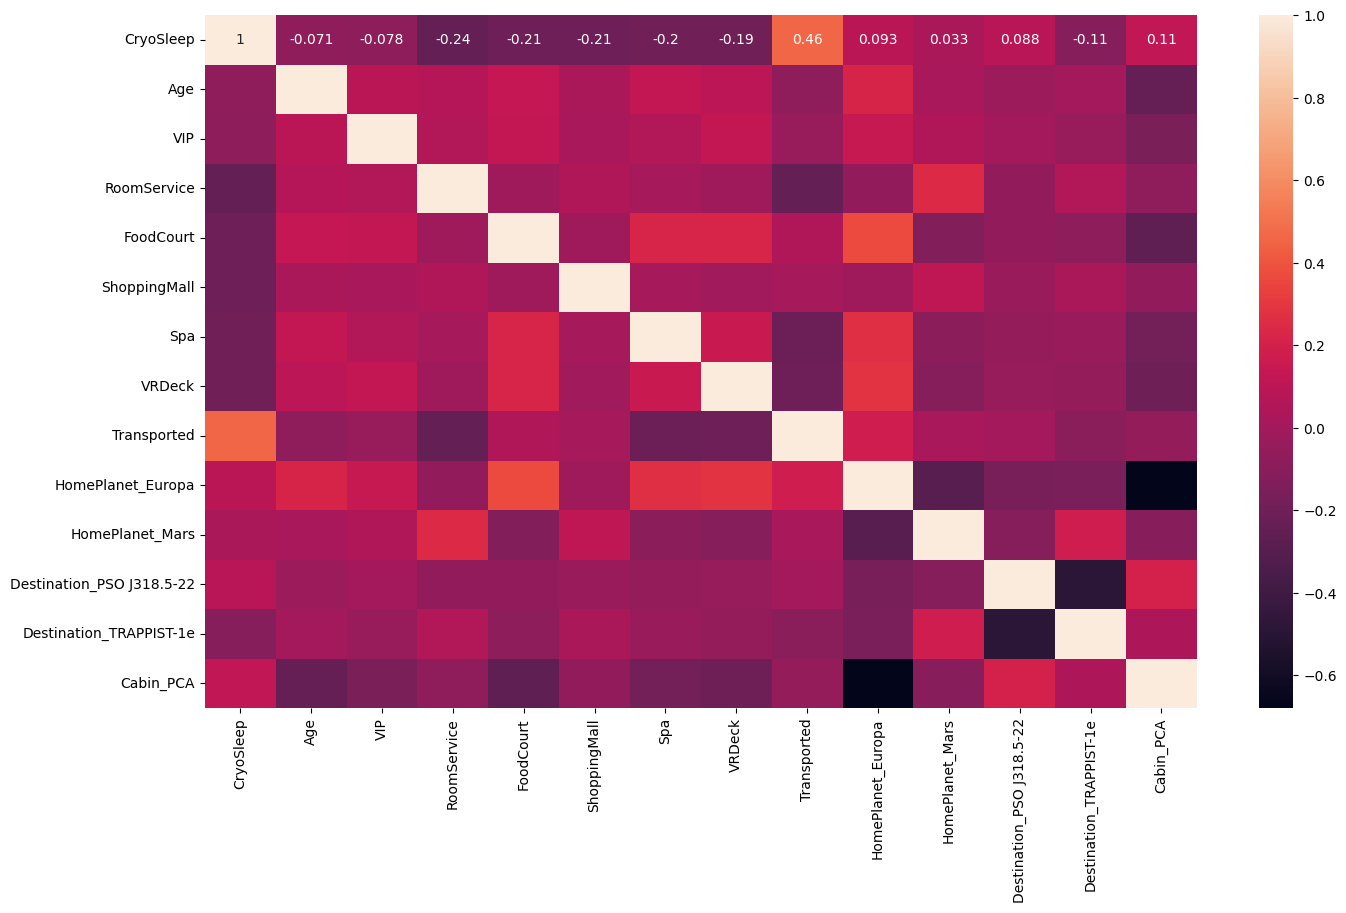

In [60]:
# Correlation matrix
plt.figure(figsize=(16, 9))
sns.heatmap(data.corr(), annot = True)

#### Feature Selection

In [61]:
from sklearn.model_selection import train_test_split

# Extract features (X) and target variable (y)
X = data.drop(columns=['Transported']) 
y = data['Transported']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now, X_train and y_train contain the features and target variable for training,
# and X_test and y_test contain the features and target variable for testing.


In [62]:
data

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Europa,HomePlanet_Mars,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Cabin_PCA
0,False,0.709437,False,-0.340590,-0.287314,-0.290817,-0.276663,-0.269023,False,True,False,False,True,-3069.609341
1,False,-0.336717,False,-0.175364,-0.281669,-0.248968,0.211505,-0.230194,True,False,False,False,True,-1034.609341
2,False,2.034566,True,-0.275409,1.955616,-0.290817,5.694289,-0.225782,False,True,False,False,True,-3217.609341
3,False,0.290975,False,-0.340590,0.517406,0.330225,2.683471,-0.098708,False,True,False,False,True,-3217.609341
4,False,-0.894666,False,0.118709,-0.243409,-0.038048,0.225732,-0.267258,True,False,False,False,True,-1032.609341
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,False,0.848924,True,-0.340590,3.989682,-0.290817,1.184286,-0.203720,False,True,False,False,False,-3072.609341
8689,True,-0.755179,False,-0.340590,-0.287314,-0.290817,-0.276663,-0.269023,False,False,False,True,False,2061.390659
8690,False,-0.197230,False,-0.340590,-0.287314,2.842851,-0.275774,-0.269023,True,False,False,False,True,2066.390659
8691,False,0.221232,False,-0.340590,0.370637,-0.290817,0.037223,2.585740,False,True,False,False,False,-1087.609341


In [63]:
test

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Europa,HomePlanet_Mars,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Cabin_PCA
0,True,-1.182216e-01,False,-0.364780,-0.291352,-0.319859,-0.274558,-0.251561,False,False,False,True,1185.052139
1,False,-6.886014e-01,False,-0.364780,-0.285385,-0.319859,2.283008,-0.251561,False,False,False,True,268.052139
2,True,1.669682e-01,False,-0.364780,-0.291352,-0.319859,-0.274558,-0.251561,True,False,False,False,-1341.947861
3,False,6.660505e-01,False,-0.364780,4.118523,-0.319859,-0.110576,0.222074,True,False,False,True,-1339.947861
4,False,-6.173039e-01,False,-0.348143,-0.291352,0.825745,-0.274558,-0.251561,False,False,False,True,341.052139
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,True,3.808606e-01,False,-0.364780,-0.291352,-0.319859,-0.274558,-0.251561,False,False,False,True,1080.052139
4273,False,9.512404e-01,False,-0.364780,0.270158,-0.289189,-0.265498,-0.134974,False,False,False,True,1092.052139
4274,True,-2.532995e-16,False,-0.364780,-0.291352,-0.319859,-0.274558,-0.251561,False,True,False,False,-996.947861
4275,False,-2.532995e-16,False,-0.364780,1.485327,-0.319859,-0.274558,0.171877,True,False,False,True,-995.947861


In [64]:
# Define the Parameter Grid for Grid Search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
}

In [65]:
# initialize the random forest classifier
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(random_state=42)

In [66]:
# Perform grid search with cross validation
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'n_estimators': [100, 200, 300]})

In [67]:
# Make Predictions and Evaluate the Model
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

best_rf_classifier = RandomForestClassifier(n_estimators=best_params['n_estimators'], 
                                            max_depth=best_params['max_depth'], 
                                            random_state=42)
best_rf_classifier.fit(X_train, y_train)


Best Parameters: {'max_depth': 10, 'n_estimators': 300}


RandomForestClassifier(max_depth=10, n_estimators=300, random_state=42)

In [ ]:
#Get feature importances from the trained model
feature_importances = best_rf_classifier.feature_importances_

In [ ]:
# Sort feature importances in descending order and get corresponding indices
indices = feature_importances.argsort()[::-1]

# Print feature importances
print("Feature Importances:")
for feature, importance in zip(X_train.columns[indices], feature_importances[indices]):
    print(f"{feature}: {importance}")

In [68]:
X_train.isnull().sum()

CryoSleep                    0
Age                          0
VIP                          0
RoomService                  0
FoodCourt                    0
ShoppingMall                 0
Spa                          0
VRDeck                       0
HomePlanet_Europa            0
HomePlanet_Mars              0
Destination_PSO J318.5-22    0
Destination_TRAPPIST-1e      0
Cabin_PCA                    0
dtype: int64

In [69]:
# Select top k features based on feature importances (you can choose your own value for k)
from sklearn.feature_selection import SelectFromModel
k = 10
sfm = SelectFromModel(rf_classifier, threshold=-np.inf, max_features=k)
sfm.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(random_state=42),
                max_features=10, threshold=-inf)

In [70]:
# Transform the training data to include only the top k features
X_train_selected = sfm.transform(X_train)

# Transform the test data to include only the top k features
X_test_selected = sfm.transform(X_test)

## Model building

In [71]:
def training (model, X_train_set, X_test_set):
    model.fit(X_train_set, y_train)
    
    pred = model.predict(X_test_set)
    pred = pred.astype(y_test.dtype)
    
    print('Accuracy score: ', accuracy_score(y_test, pred))
    print()
    print('Precision score: ', precision_score(y_test, pred))
    print()
    print('Recall score: ', recall_score(y_test, pred))
    print()
    print('F1 score: ',f1_score(y_test, pred))
    print()
    print(confusion_matrix(y_test, pred))
    print()
    print(classification_report(y_test, pred))
    
    return model

##### Without feature selection

In [72]:
# Random forest classifier without feature selection
m =training(RandomForestClassifier(n_estimators=200, max_depth=10,random_state=42), X_train, X_test)



Accuracy score:  0.7912593444508338

Precision score:  0.7736450584484591

Recall score:  0.8291571753986332

F1 score:  0.80043980208906

[[648 213]
 [150 728]]

              precision    recall  f1-score   support

       False       0.81      0.75      0.78       861
        True       0.77      0.83      0.80       878

    accuracy                           0.79      1739
   macro avg       0.79      0.79      0.79      1739
weighted avg       0.79      0.79      0.79      1739



In [73]:
test_prediction =m.predict(test)

pred = pd.DataFrame({'PassengerId': Id,
    'Transported': test_prediction})
pred

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True


In [74]:
pred.to_csv('Spaceship_submission.csv', index = False)

In [75]:
# pd.read_csv('sample_submission.csv')

In [76]:
#test prediction
test_prediction = pd.concat

In [77]:
# Logistic Regression without feature selection
training(LogisticRegression(random_state=42, max_iter=1000), X_train, X_test)

Accuracy score:  0.780333525014376

Precision score:  0.765524625267666

Recall score:  0.8143507972665148

F1 score:  0.7891832229580573

[[642 219]
 [163 715]]

              precision    recall  f1-score   support

       False       0.80      0.75      0.77       861
        True       0.77      0.81      0.79       878

    accuracy                           0.78      1739
   macro avg       0.78      0.78      0.78      1739
weighted avg       0.78      0.78      0.78      1739



LogisticRegression(max_iter=1000, random_state=42)

In [78]:
#XGB classifier without feature selection
training(XGBClassifier(), X_train, X_test)

c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use

Accuracy score:  0.7889591719378953

Precision score:  0.7926689576174112

Recall score:  0.7881548974943052

F1 score:  0.7904054825813821

[[680 181]
 [186 692]]

              precision    recall  f1-score   support

       False       0.79      0.79      0.79       861
        True       0.79      0.79      0.79       878

    accuracy                           0.79      1739
   macro avg       0.79      0.79      0.79      1739
weighted avg       0.79      0.79      0.79      1739



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

##### With Feature Selection

In [79]:
# Random forest classifier with feature selection
training(RandomForestClassifier(n_estimators=200, 
                                max_depth=10,
                                random_state=42),
         X_train_selected, X_test_selected)

Accuracy score:  0.7872340425531915

Precision score:  0.7684989429175476

Recall score:  0.8280182232346242

F1 score:  0.7971491228070176

[[642 219]
 [151 727]]

              precision    recall  f1-score   support

       False       0.81      0.75      0.78       861
        True       0.77      0.83      0.80       878

    accuracy                           0.79      1739
   macro avg       0.79      0.79      0.79      1739
weighted avg       0.79      0.79      0.79      1739



RandomForestClassifier(max_depth=10, n_estimators=200, random_state=42)

In [80]:
# Logistic regression model with feature selection
training(LogisticRegression(random_state=42, max_iter=1000), X_train_selected, X_test_selected)

Accuracy score:  0.7740080506037953

Precision score:  0.7633007600434311

Recall score:  0.8006833712984055

F1 score:  0.7815453029460812

[[643 218]
 [175 703]]

              precision    recall  f1-score   support

       False       0.79      0.75      0.77       861
        True       0.76      0.80      0.78       878

    accuracy                           0.77      1739
   macro avg       0.77      0.77      0.77      1739
weighted avg       0.77      0.77      0.77      1739



LogisticRegression(max_iter=1000, random_state=42)

In [81]:
# The XGBclassifier with the selected features
training(XGBClassifier(), X_train_selected, X_test_selected)

c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


Accuracy score:  0.7860839562967222

Precision score:  0.7804878048780488

Recall score:  0.8018223234624146

F1 score:  0.7910112359550562

[[663 198]
 [174 704]]

              precision    recall  f1-score   support

       False       0.79      0.77      0.78       861
        True       0.78      0.80      0.79       878

    accuracy                           0.79      1739
   macro avg       0.79      0.79      0.79      1739
weighted avg       0.79      0.79      0.79      1739



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

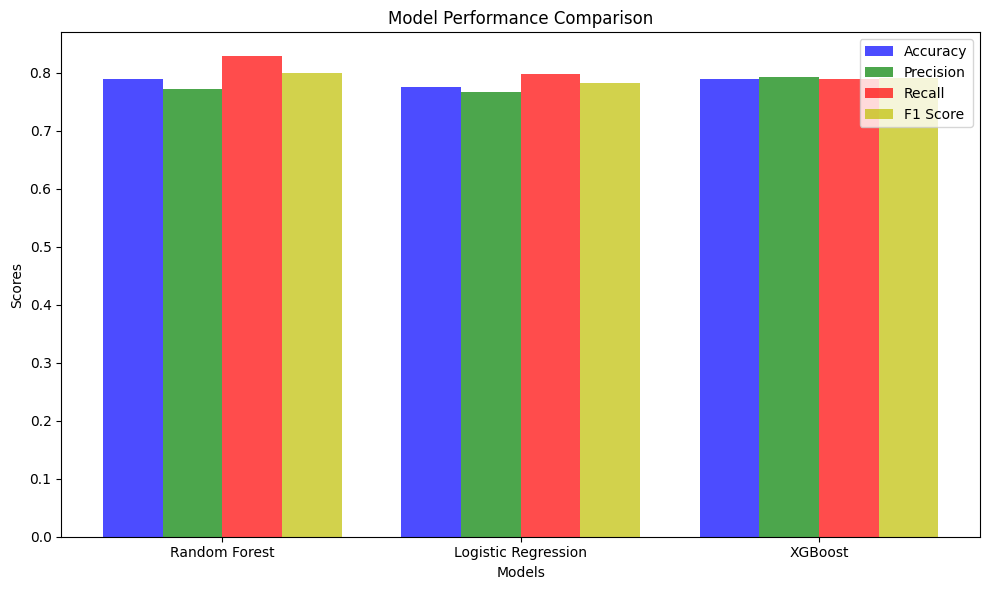

In [82]:
# Define the model names and their corresponding performance metrics
models = ['Random Forest', 'Logistic Regression', 'XGBoost']
accuracy = [0.7895, 0.7752, 0.7890]
precision = [0.7718, 0.7667, 0.7927]
recall = [0.8280, 0.7973, 0.7882]
f1_score = [0.7989, 0.7817, 0.7904]

bar_width = 0.2
index = range(len(models))
fig, ax = plt.subplots(figsize=(10, 6))

plt.bar(index, accuracy, bar_width, label='Accuracy', color='b', alpha=0.7)
plt.bar([i + bar_width for i in index], precision, bar_width, label='Precision', color='g', alpha=0.7)
plt.bar([i + 2 * bar_width for i in index], recall, bar_width, label='Recall', color='r', alpha=0.7)
plt.bar([i + 3 * bar_width for i in index], f1_score, bar_width, label='F1 Score', color='y', alpha=0.7)

plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Model Performance Comparison')
plt.xticks([i + 1.5 * bar_width for i in index], models)
plt.legend()

plt.tight_layout()
plt.show()


#### Preprocessing 2

In [83]:
## Scale the Cabin_PCA column
# Extract the PCA components from the DataFrame
pca_data = data['Cabin_PCA'].values.reshape(-1, 1) 

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the PCA components using StandardScaler
scaled_pca_data = scaler.fit_transform(pca_data)

# Create a new column in the DataFrame for scaled PCA components
data['Scaled_Cabin_PCA'] = scaled_pca_data

In [84]:
## Drop original column
data = data.drop(columns=['Cabin_PCA'])

In [85]:
data.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Europa,HomePlanet_Mars,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Scaled_Cabin_PCA
0,False,0.709437,False,-0.340590,-0.287314,-0.290817,-0.276663,-0.269023,False,True,False,False,True,-1.531918
1,False,-0.336717,False,-0.175364,-0.281669,-0.248968,0.211505,-0.230194,True,False,False,False,True,-0.516332
2,False,2.034566,True,-0.275409,1.955616,-0.290817,5.694289,-0.225782,False,True,False,False,True,-1.605779
3,False,0.290975,False,-0.340590,0.517406,0.330225,2.683471,-0.098708,False,True,False,False,True,-1.605779
4,False,-0.894666,False,0.118709,-0.243409,-0.038048,0.225732,-0.267258,True,False,False,False,True,-0.515334


#### Convert True/False values to 1 and 0
while retaining the original dataset

In [86]:
df = data.copy()

In [87]:
# List of columns with boolean values to convert
boolean_columns = ['CryoSleep', 'VIP', 'Transported', 'HomePlanet_Europa', 'HomePlanet_Mars', 'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e']

# Convert True and False to 1 and 0 for selected boolean columns
df[boolean_columns] = df[boolean_columns].astype(int)

In [88]:
df.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Europa,HomePlanet_Mars,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Scaled_Cabin_PCA
0,0,0.709437,0,-0.340590,-0.287314,-0.290817,-0.276663,-0.269023,0,1,0,0,1,-1.531918
1,0,-0.336717,0,-0.175364,-0.281669,-0.248968,0.211505,-0.230194,1,0,0,0,1,-0.516332
2,0,2.034566,1,-0.275409,1.955616,-0.290817,5.694289,-0.225782,0,1,0,0,1,-1.605779
3,0,0.290975,0,-0.340590,0.517406,0.330225,2.683471,-0.098708,0,1,0,0,1,-1.605779
4,0,-0.894666,0,0.118709,-0.243409,-0.038048,0.225732,-0.267258,1,0,0,0,1,-0.515334


##### Remove outliers from the dataset

In [89]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile) for the entire DataFrame
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

# Calculate IQR for the entire DataFrame
IQR = Q3 - Q1

# Define lower and upper bounds for outliers for the entire DataFrame
lower_bound = Q1 - 2.0 * IQR
upper_bound = Q3 + 2.0 * IQR

# Remove outliers for the entire DataFrame and update the DataFrame
df_new= df[(df >= lower_bound) & (df <= upper_bound)]

# 'df_no_outliers' now contains the DataFrame with outliers removed from all columns

In [90]:
df_new.shape

(8693, 14)

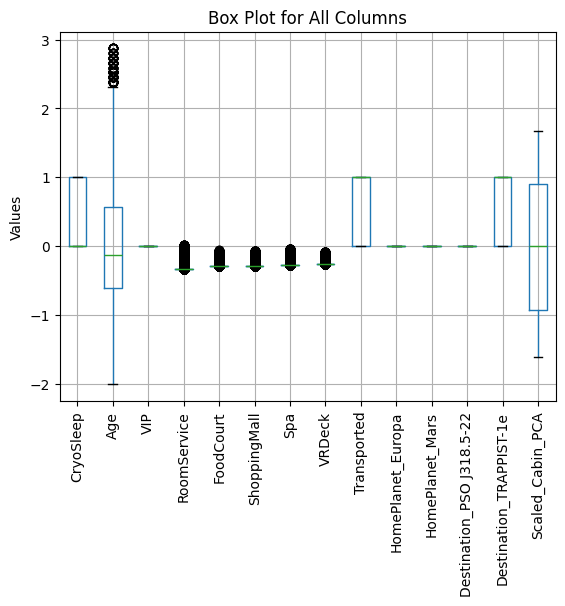

In [91]:
## Visualizing using box plots
columns_to_check = ['CryoSleep', 'VIP', 'Transported', 'HomePlanet_Europa', 'HomePlanet_Mars', 'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e']
df_new.boxplot()
plt.title("Box Plot for All Columns")
plt.ylabel("Values")
plt.xticks(rotation=90)
plt.show()


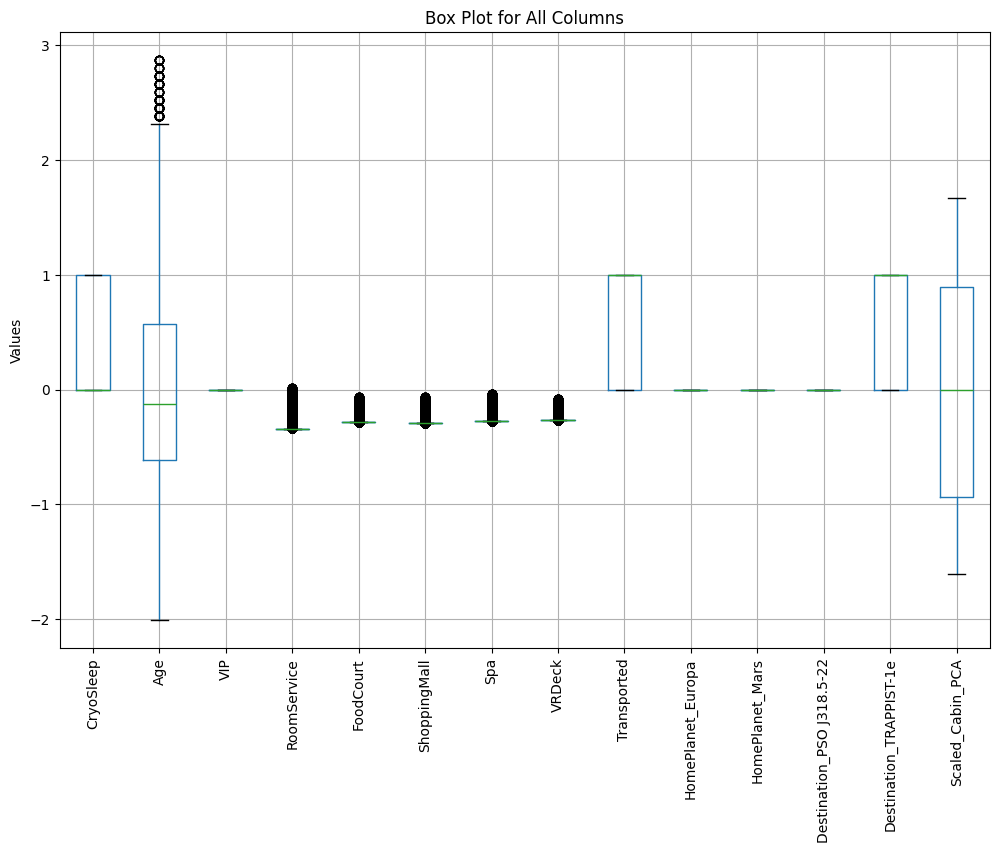

In [92]:
# Create box plots for all columns to check for outliers
plt.figure(figsize=(12, 8))
df_new.boxplot()
plt.title("Box Plot for All Columns")
plt.ylabel("Values")
plt.xticks(rotation=90)
plt.show()

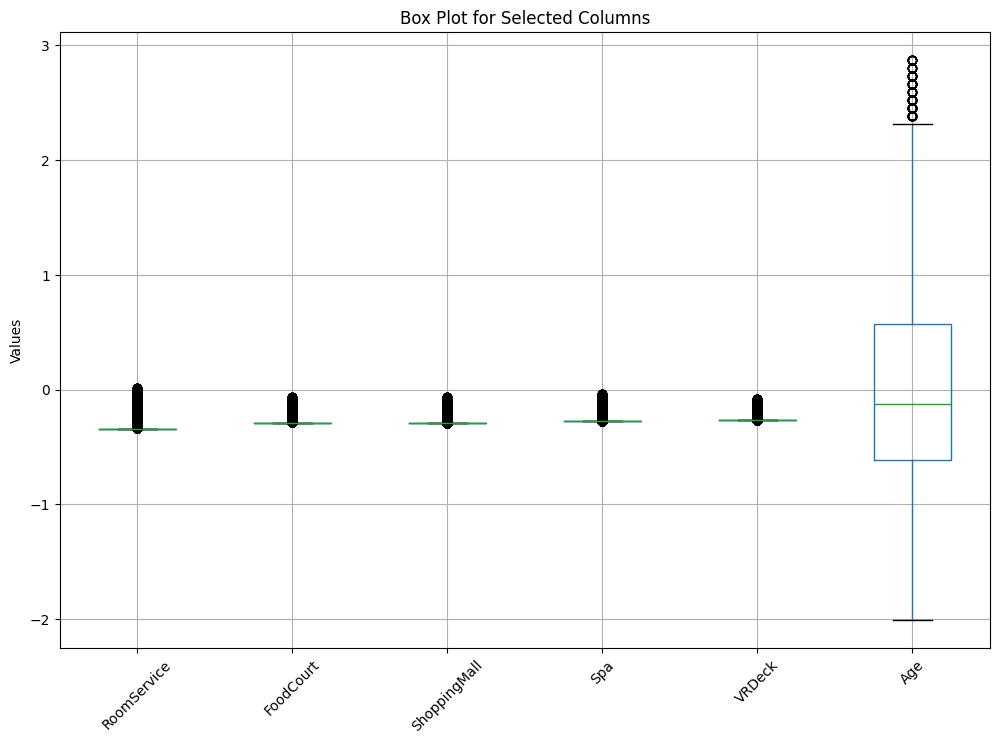

In [93]:
columns_to_check = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Age']

# Create box plots for selected columns
plt.figure(figsize=(12, 8))
df_new[columns_to_check].boxplot()
plt.title("Box Plot for Selected Columns")
plt.ylabel("Values")
plt.xticks(rotation=45)
plt.show()


In [94]:
## Drop more outliers using z score method
from scipy.stats import zscore

# Columns with numerous outliers
columns_with_outliers = ['RoomService', 'FoodCourt', 'ShoppingMall', 'VRDeck', 'Spa', 'Age']

# Calculate Z-scores for the specified columns
z_scores = zscore(df_new[columns_with_outliers])

# Define a threshold for Z-score 
threshold = 3

# Create a mask to filter rows with outliers in specified columns
outliers_mask = (z_scores > threshold).any(axis=1)

# Remove rows with outliers in specified columns
df_no_outliers = df_new[~outliers_mask]


In [96]:
df_no_outliers.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Europa,HomePlanet_Mars,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Scaled_Cabin_PCA
0,0,0.709437,0.0,-0.340590,-0.287314,-0.290817,-0.276663,-0.269023,0,NaN,0.0,0.0,1,-1.531918
1,0,-0.336717,0.0,-0.175364,-0.281669,-0.248968,NaN,-0.230194,1,0.0,0.0,0.0,1,-0.516332
2,0,2.034566,NaN,-0.275409,NaN,-0.290817,NaN,-0.225782,0,NaN,0.0,0.0,1,-1.605779
3,0,0.290975,0.0,-0.340590,NaN,NaN,NaN,-0.098708,0,NaN,0.0,0.0,1,-1.605779
4,0,-0.894666,0.0,NaN,-0.243409,NaN,NaN,-0.267258,1,0.0,0.0,0.0,1,-0.515334


We observe missing values

In [97]:
df_no_outliers.isna().sum()

CryoSleep                       0
Age                            37
VIP                           199
RoomService                  1591
FoodCourt                    1754
ShoppingMall                 1795
Spa                          1697
VRDeck                       1768
Transported                     0
HomePlanet_Europa            2131
HomePlanet_Mars              1759
Destination_PSO J318.5-22     796
Destination_TRAPPIST-1e         0
Scaled_Cabin_PCA                0
dtype: int64

##### Handle missing values using KNN Imputer

In [98]:
from sklearn.impute import KNNImputer

# Create a KNN imputer instance
knn_imputer = KNNImputer(n_neighbors=5)

# Fill missing values using KNN imputer
df_no_outliers_filled = knn_imputer.fit_transform(df_no_outliers)
df_no_outliers_filled = pd.DataFrame(df_no_outliers_filled, columns=df_no_outliers.columns)

In [99]:
df_no_outliers_filled.isna().sum()

CryoSleep                    0
Age                          0
VIP                          0
RoomService                  0
FoodCourt                    0
ShoppingMall                 0
Spa                          0
VRDeck                       0
Transported                  0
HomePlanet_Europa            0
HomePlanet_Mars              0
Destination_PSO J318.5-22    0
Destination_TRAPPIST-1e      0
Scaled_Cabin_PCA             0
dtype: int64

In [100]:
df_preprocessed = df_no_outliers_filled

In [101]:
df_preprocessed

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Europa,HomePlanet_Mars,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Scaled_Cabin_PCA
0,0.0,0.709437,0.0,-0.340590,-0.287314,-0.290817,-0.276663,-0.269023,0.0,0.0,0.0,0.0,1.0,-1.531918
1,0.0,-0.336717,0.0,-0.175364,-0.281669,-0.248968,-0.262258,-0.230194,1.0,0.0,0.0,0.0,1.0,-0.516332
2,0.0,2.034566,0.0,-0.275409,-0.248677,-0.290817,-0.215487,-0.225782,0.0,0.0,0.0,0.0,1.0,-1.605779
3,0.0,0.290975,0.0,-0.340590,-0.236886,-0.288808,-0.229536,-0.098708,0.0,0.0,0.0,0.0,1.0,-1.605779
4,0.0,-0.894666,0.0,-0.272472,-0.243409,-0.288139,-0.244830,-0.267258,1.0,0.0,0.0,0.0,1.0,-0.515334
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0.0,0.848924,0.0,-0.340590,-0.232119,-0.290817,-0.269016,-0.203720,0.0,0.0,0.0,0.0,0.0,-1.533415
8689,1.0,-0.755179,0.0,-0.340590,-0.287314,-0.290817,-0.276663,-0.269023,0.0,0.0,0.0,0.0,0.0,1.028757
8690,0.0,-0.197230,0.0,-0.340590,-0.287314,-0.289143,-0.275774,-0.269023,1.0,0.0,0.0,0.0,1.0,1.031252
8691,0.0,0.221232,0.0,-0.340590,-0.279913,-0.290817,-0.240562,-0.265493,0.0,0.0,0.0,0.0,0.0,-0.542782


In [102]:
# splitting the data
X = df_preprocessed.drop('Transported', axis = 1)
y = df_preprocessed.Transported


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=10)

# model building 2

In [104]:
# Random forest classifier without feature selection
# training(RandomForestClassifier(n_estimators=200, max_depth=10,random_state=42), X_train, X_test)

In [108]:
# Random forest classifier without feature selection
# training(LogisticRegression(random_state=42), X_train, X_test)

In [107]:
# Random forest classifier without feature selection
# training(XGBClassifier(n_estimators=200, max_depth=10,random_state=42), X_train, X_test)